In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
# Pull in average happiness data
happiness_file = "../Happiness/Resources/avg_happiness.csv"
happiness_df = pd.read_csv(happiness_file, encoding = "UTF-8")
happiness_df.head()

,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Avg Happiness
0,Switzerland,7.587,7.509,7.494,7.487,7.480,7.5114
1,Iceland,7.561,7.501,7.504,7.495,7.494,7.5110
2,Denmark,7.527,7.526,7.522,7.555,7.600,7.5460
3,Norway,7.522,7.498,7.537,7.594,7.554,7.5410
4,Canada,7.427,7.404,7.316,7.328,7.278,7.3506


## Study Changes in Happiness Scores over time (sample size = 5 countries)

In [33]:
# Select a random sample of 5 countries and reset index to Country Name
sample_happiness_df = happiness_df.sample(5)
sample_happiness_df.set_index('Country', inplace = True)
sample_happiness_df.drop(columns = "Avg Happiness", inplace = True)

# Save df to csv file
sample_happiness_df.to_csv("Resources/happiness_sample.csv",
                                index = True, header = True)
sample_happiness_df

,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019
Country,,,,,
Spain,6.329,6.361,6.403,6.310,6.354
Mexico,7.187,6.778,6.578,6.488,6.595
Tunisia,4.739,5.045,4.805,4.592,4.461
Jamaica,5.709,5.510,5.311,5.890,5.890
Argentina,6.574,6.650,6.599,6.388,6.086


In [34]:
# Create variables for names of different countries in the sample
country_1_name = sample_happiness_df.index[0]
country_2_name = sample_happiness_df.index[1]
country_3_name = sample_happiness_df.index[2]
country_4_name = sample_happiness_df.index[3]
country_5_name = sample_happiness_df.index[4]

In [35]:
# Create variables holding numpy arrays of different rows of the sample_happiness_df
country_1_info = sample_happiness_df.iloc[0].values
country_2_info = sample_happiness_df.iloc[1].values
country_3_info = sample_happiness_df.iloc[2].values
country_4_info = sample_happiness_df.iloc[3].values
country_5_info = sample_happiness_df.iloc[4].values

In [36]:
# Create a DataFrame to display Happiness Scores over time for sample countries
year = ['2015', '2016', '2017', '2018', '2019']
sample_happiness_updated = pd.DataFrame({country_1_name: country_1_info,\
                                        country_2_name: country_2_info,\
                                        country_3_name: country_3_info,\
                                        country_4_name: country_4_info,\
                                        country_5_name: country_5_info,\
                                        "Year":year})
sample_happiness_updated.set_index("Year", inplace = True)
sample_happiness_updated

,Spain,Mexico,Tunisia,Jamaica,Argentina
Year,,,,,
2015,6.329,7.187,4.739,5.709,6.574
2016,6.361,6.778,5.045,5.510,6.650
2017,6.403,6.578,4.805,5.311,6.599
2018,6.310,6.488,4.592,5.890,6.388
2019,6.354,6.595,4.461,5.890,6.086


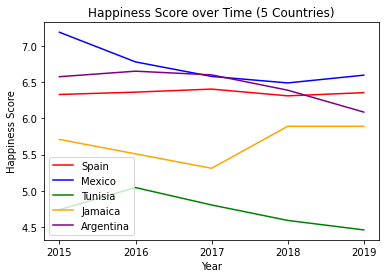

In [37]:
# Add labels to X and Y axes :: Add title
plt.title("Happiness Score over Time (5 Countries)")
plt.xlabel("Year")
plt.ylabel("Happiness Score")

# Plot the charts and apply some styling
country_1, = plt.plot(year, country_1_info, color="red", label= country_1_name)
country_2, = plt.plot(year, country_2_info, color="blue", label= country_2_name)
country_3, = plt.plot(year, country_3_info, color="green", label= country_3_name)
country_4, = plt.plot(year, country_4_info, color="orange", label= country_4_name)
country_5, = plt.plot(year, country_5_info, color= "purple", label= country_5_name)

# Create a legend for the chart
plt.legend(handles=[country_1, country_2, country_3, country_4, country_5], loc="best")

## Study Changes in Happiness Scores over time (Countries with Highest vs. Lowest Avg. Happiness Score)

### Countries with Highest Avg. Happiness Score (Sample = 10 Countries)

In [70]:
# Get information for top 10 countries with the highest average happiness score
happiness_df = happiness_df.sort_values(by = ['Avg Happiness'], ascending = False)
avg_happiness_top10_df = happiness_df.iloc[:10]
avg_happiness_top10_df.set_index('Country', inplace = True)
avg_happiness_top10_df

,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Avg Happiness
Country,,,,,,
Denmark,7.527,7.526,7.522,7.555,7.600,7.5460
Norway,7.522,7.498,7.537,7.594,7.554,7.5410
Finland,7.406,7.413,7.469,7.632,7.769,7.5378
Switzerland,7.587,7.509,7.494,7.487,7.480,7.5114
Iceland,7.561,7.501,7.504,7.495,7.494,7.5110
Netherlands,7.378,7.339,7.377,7.441,7.488,7.4046
Canada,7.427,7.404,7.316,7.328,7.278,7.3506
Sweden,7.364,7.291,7.284,7.314,7.343,7.3192
New Zealand,7.286,7.334,7.314,7.324,7.307,7.3130


In [71]:
# Create a new DataFrame that does not include 'Avg Happiness' column and can be used for future analysis
happiness_top10_df = avg_happiness_top10_df.drop(columns = 'Avg Happiness')

# Save to csv
happiness_top10_df.to_csv("Resources/happiness_top10.csv",
                                index = True, header = True)

In [72]:
# Create variables for names of different countries
country_1_name = happiness_top10_df.index[0]
country_2_name = happiness_top10_df.index[1]
country_3_name = happiness_top10_df.index[2]
country_4_name = happiness_top10_df.index[3]
country_5_name = happiness_top10_df.index[4]
# country_6_name = happiness_top10_df.index[5]
# country_7_name = happiness_top10_df.index[6]
# country_8_name = happiness_top10_df.index[7]
# country_9_name = happiness_top10_df.index[8]
# country_10_name = happiness_top10_df.index[9]

In [73]:
# Create variables holding numpy arrays of different rows of the sample_happiness_df
country_1_info = happiness_top10_df.iloc[0].values
country_2_info = happiness_top10_df.iloc[1].values
country_3_info = happiness_top10_df.iloc[2].values
country_4_info = happiness_top10_df.iloc[3].values
country_5_info = happiness_top10_df.iloc[4].values
# country_6_info = happiness_top10_df.iloc[5].values
# country_7_info = happiness_top10_df.iloc[6].values
# country_8_info = happiness_top10_df.iloc[7].values
# country_9_info = happiness_top10_df.iloc[8].values
# country_10_info = happiness_top10_df.iloc[9].values

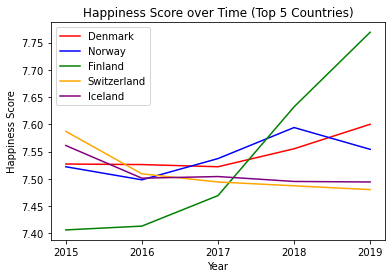

In [74]:
# Add labels to X and Y axes :: Add title
year = ['2015', '2016', '2017', '2018', '2019']
plt.title("Happiness Score over Time (Top 5 Countries)")
plt.xlabel("Year")
plt.ylabel("Happiness Score")

# Plot the charts and apply some styling
country_1, = plt.plot(year, country_1_info, color="red", label= country_1_name)
country_2, = plt.plot(year, country_2_info, color="blue", label= country_2_name)
country_3, = plt.plot(year, country_3_info, color="green", label= country_3_name)
country_4, = plt.plot(year, country_4_info, color="orange", label= country_4_name)
country_5, = plt.plot(year, country_5_info, color= "purple", label= country_5_name)
# country_6, = plt.plot(year, country_6_info, color= "gold", label= country_6_name)
# country_7, = plt.plot(year, country_7_info, color= "coral", label= country_7_name)
# country_8, = plt.plot(year, country_8_info, color= "skyblue", label= country_8_name)
# country_9, = plt.plot(year, country_9_info, color= "magenta", label= country_9_name)
# country_10, = plt.plot(year, country_10_info, color= "tomato", label= country_10_name)

# Create a legend for the chart
plt.legend(handles=[country_1, country_2, country_3, country_4, country_5], loc="best")
# plt.legend(handles=[country_1, country_2, country_3, country_4, country_5,\
#                     country_6, country_7, country_8, country_9, country_10], loc="best")

### Countries with Lowest Avg. Happiness Score (Sample = 10 Countries)

In [75]:
# Get information for bottom 10 countries with the lowest average happiness score
avg_happiness_bottom10_df = happiness_df.iloc[-10:]
avg_happiness_bottom10_df.set_index('Country', inplace = True)
avg_happiness_bottom10_df = avg_happiness_bottom10_df.sort_values(by = ['Avg Happiness'], ascending = True)
avg_happiness_bottom10_df

,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Avg Happiness
Country,,,,,,
Burundi,2.905,2.905,2.905,2.905,3.775,3.0790
Syria,3.006,3.069,3.462,3.462,3.462,3.2922
Rwanda,3.465,3.515,3.471,3.408,3.334,3.4386
Tanzania,3.781,3.666,3.349,3.303,3.231,3.4660
Afghanistan,3.575,3.360,3.794,3.632,3.203,3.5128
Togo,2.839,3.303,3.495,3.999,4.085,3.5442
Yemen,4.077,3.724,3.593,3.355,3.380,3.6258
Madagascar,3.681,3.695,3.644,3.774,3.933,3.7454
Botswana,4.332,3.974,3.766,3.590,3.488,3.8300


In [76]:
# Create a new DataFrame that does not include 'Avg Happiness' column and can be used for future analysis
happiness_bottom10_df = avg_happiness_bottom10_df.drop(columns = 'Avg Happiness')

# Save to csv
happiness_bottom10_df.to_csv("Resources/happiness_bottom10.csv",
                                index = True, header = True)

In [77]:
# Create variables for names of different countries
country_1_name = happiness_bottom10_df.index[0]
country_2_name = happiness_bottom10_df.index[1]
country_3_name = happiness_bottom10_df.index[2]
country_4_name = happiness_bottom10_df.index[3]
country_5_name = happiness_bottom10_df.index[4]
# country_6_name = happiness_bottom10_df.index[5]
# country_7_name = happiness_bottom10_df.index[6]
# country_8_name = happiness_bottom10_df.index[7]
# country_9_name = happiness_bottom10_df.index[8]
# country_10_name = happiness_bottom10_df.index[9]

In [78]:
# Create variables holding numpy arrays of different rows of the sample_happiness_df
country_1_info = happiness_bottom10_df.iloc[0].values
country_2_info = happiness_bottom10_df.iloc[1].values
country_3_info = happiness_bottom10_df.iloc[2].values
country_4_info = happiness_bottom10_df.iloc[3].values
country_5_info = happiness_bottom10_df.iloc[4].values
# country_6_info = happiness_bottom10_df.iloc[5].values
# country_7_info = happiness_bottom10_df.iloc[6].values
# country_8_info = happiness_bottom10_df.iloc[7].values
# country_9_info = happiness_bottom10_df.iloc[8].values
# country_10_info = happiness_bottom10_df.iloc[9].values

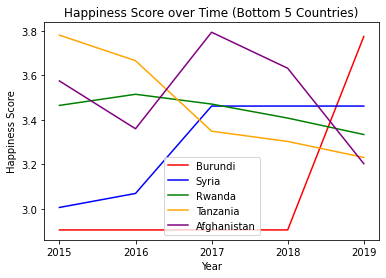

In [79]:
# Add labels to X and Y axes :: Add title
year = ['2015', '2016', '2017', '2018', '2019']
plt.title("Happiness Score over Time (Bottom 5 Countries)")
plt.xlabel("Year")
plt.ylabel("Happiness Score")

# Plot the charts and apply some styling
country_1, = plt.plot(year, country_1_info, color="red", label= country_1_name)
country_2, = plt.plot(year, country_2_info, color="blue", label= country_2_name)
country_3, = plt.plot(year, country_3_info, color="green", label= country_3_name)
country_4, = plt.plot(year, country_4_info, color="orange", label= country_4_name)
country_5, = plt.plot(year, country_5_info, color= "purple", label= country_5_name)
# country_6, = plt.plot(year, country_6_info, color= "gold", label= country_6_name)
# country_7, = plt.plot(year, country_7_info, color= "coral", label= country_7_name)
# country_8, = plt.plot(year, country_8_info, color= "skyblue", label= country_8_name)
# country_9, = plt.plot(year, country_9_info, color= "magenta", label= country_9_name)
# country_10, = plt.plot(year, country_10_info, color= "tomato", label= country_10_name)

# Create a legend for the chart
plt.legend(handles=[country_1, country_2, country_3, country_4, country_5], loc="best")
# plt.legend(handles=[country_1, country_2, country_3, country_4, country_5,\
#                     country_6, country_7, country_8, country_9, country_10], loc="best")